# Práctico: Recomendación de Artistas

En este práctico trabajaremos con el conjuto de datos de [LastFM](https://grouplens.org/datasets/hetrec-2011/) para el desarrollo de un sistema de recomendación que, dado el nombre de un artista musical, devuelve una lista de artistas "similares".

Para el práctico utilizaremos el conjunto de datos de LastFM que consiguieron del [notebook de instalación](./instalacion.ipynb). Se recomienda leer el [Readme](http://files.grouplens.org/datasets/hetrec2011/hetrec2011-lastfm-readme.txt) de los datos para saber más sobre que información contiene cada archivo.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
os.getcwd()
os.chdir('C:\\Users\\gonza\\Google Drive\\Data Science\\Diplo Datos FAMAF\\SistemasDeRecomendacion\\practico')

In [3]:
artist_data = pd.read_csv("../data/lastfm/artists.dat", sep="\t")
artist_data.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...


In [4]:
artist_dict=artist_data[['id','name']].set_index('id').T.to_dict(orient='list')

In [5]:
# 92834 user-listened artist relations, i.e. tuples [user, artist, listeningCount]
# weigth = Listening Count
user_artist_plays = pd.read_csv("../data/lastfm/user_artists.dat", sep="\t")
user_artist_plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [6]:
tag_artist_data = pd.read_csv("../data/lastfm/user_taggedartists.dat", sep="\t")
tag_artist_data[tag_artist_data.userID==3].sort_values(by=['year','month'],ascending=True)

,userID,artistID,tagID,day,month,year
47,3,101,33,1,2,2009
81,3,108,15,1,2,2009
82,3,108,33,1,2,2009
83,3,108,46,1,2,2009
85,3,108,49,1,2,2009
86,3,108,55,1,2,2009
87,3,122,15,1,2,2009
88,3,122,33,1,2,2009
89,3,122,46,1,2,2009
46,3,101,15,1,3,2009


In [7]:
tag_data = pd.read_csv("../data/lastfm/tags.dat", sep="\t",  encoding='latin-1')
tag_data.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [67]:
genres_dict=tag_data[['tagID','tagValue']].set_index('tagID').T.to_dict(orient='list')

{1: ['metal'],
 2: ['alternative metal'],
 3: ['goth rock'],
 4: ['black metal'],
 5: ['death metal'],
 6: ['industrial metal'],
 7: ['gothic metal'],
 8: ['terror ebm'],
 9: ['electro-industrial'],
 10: ['harsh ebm'],
 11: ['post black metal'],
 12: ['aggrotech'],
 13: ['chillout'],
 14: ['ambient'],
 15: ['downtempo'],
 16: ['new wave'],
 17: ['synth pop'],
 18: ['electronic'],
 19: ["80's"],
 20: ['lounge'],
 21: ['trip-hop'],
 22: ['acid jazz'],
 23: ['new age'],
 24: ['pop'],
 25: ['80s'],
 26: ['atmospheric'],
 27: ['ethereal'],
 28: ['deutsch'],
 29: ['schlager'],
 30: ['german'],
 31: ['hi-nrg'],
 32: ['avant-garde'],
 33: ['experimental'],
 34: ['minimal'],
 35: ['cyberpunk'],
 36: ['club house'],
 37: ['groove'],
 38: ['cafe del mar'],
 39: ['dance'],
 40: ['gregorian chant'],
 41: ['female vovalists'],
 42: ['synth-pop'],
 43: ['classic 80s'],
 44: ['glitch'],
 45: ['u-cover'],
 46: ['melancholy'],
 47: ['idm'],
 48: ['vu-us'],
 49: ['female vocalist'],
 50: ['modern classic

In [9]:
friend_data = pd.read_csv("../data/lastfm/user_friends.dat", sep="\t",  encoding='latin-1')
friend_data

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
...,...,...
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586


In [10]:
user_time=pd.read_csv("../data/lastfm/user_taggedartists-timestamps.dat", sep="\t",  encoding='latin-1')

## Actividades

El [Ejercicio 1](#Ejercicio-1---Análisis-Exploratorio-de-Datos) deberá ser realizado por quienes estén realizando cualquier parte de la materia.

El [Ejercicio 2](#Ejercicio-2---Sistema-de-Recomendación) variará de acuerdo a que parte de la materia estén realizando (quienes estén realizando la materia completa, en realidad pueden realizar ambas opciones si así lo desean).

De acuerdo a la parte de la materia que hagan, deberán realizar una de las siguientes actividades (pueden realizar ambas si así lo desean):

La idea del práctico es hacer un análisis muy sencillo del conjunto de datos y desarrollar dos sistemas de recomendación: 
1. El primero, más sencillo, utilizando [Surpr!se](http://surpriselib.com/), y a partir de los datos de LastFM, en especial del archivo `./data/lastfm/user_artists.dat`, generar un sistema de recomendación basado en filtros colaborativos.
2. En el segundo, deberán utilizar todos los datos ofrecidos en el dataset de LastFM para generar un sistema de filtrado colaborativo más complejo, deberá utilizar las técnicas aprendidas basado en filtrado colaborativo (usando Surpr!se), a partir de los datos existentes.

## Ejercicio 1 - Análisis Exploratorio de Datos

En esta primera parte deberán hacer un análisis exploratorio de los datos, aprovechando toda la información brindada por el conjunto. A partir de eso podrán tener mayor idea de qué tipo de datos estarán enfrentando (describe o hist).

Algunas preguntas para responder:
- ¿Cuáles son los artistas que fueron más escuchados?
- ¿Cómo es la distribución de cantidad de listens por user?
- ¿Es posible ver el género más escuchado?

In [11]:
# Vemos los 100 artistas más populares (escuchados por diferentes personas)
artist_pop=user_artist_plays.groupby('artistID').count().sort_values(by=['userID'],ascending=False).reset_index().iloc[0:100,]

In [12]:
# Usar un diccionario para tener la columna nombre de artista.
artist_pop['name']=artist_pop['artistID'].map(artist_dict)
artist_pop.head()

,artistID,userID,weight,name
0,89,611,611,[Lady Gaga]
1,289,522,522,[Britney Spears]
2,288,484,484,[Rihanna]
3,227,480,480,[The Beatles]
4,300,473,473,[Katy Perry]


In [13]:
# Vemos los 100 artistas con más reproducciones

user_artist_plays.groupby('artistID')['weight'].sum().sort_values(ascending=False).reset_index().iloc[0:100,]
# Para visualizar por nombres, descomentar la linea siguiente.
#user_artist_plays.groupby('artistID')['weight'].sum().sort_values(ascending=False).reset_index().iloc[0:100,]['artistID'].map(artist_dict)

,artistID,weight
0,289,2393140
1,72,1301308
2,89,1291387
3,292,1058405
4,498,963449
...,...,...
95,868,95880
96,889,94551
97,331,94501
98,1048,94398


In [14]:
rep_curve=user_artist_plays.groupby('artistID')['weight'].sum().sort_values(ascending=True).reset_index()

<AxesSubplot:xlabel='weight', ylabel='Probability'>

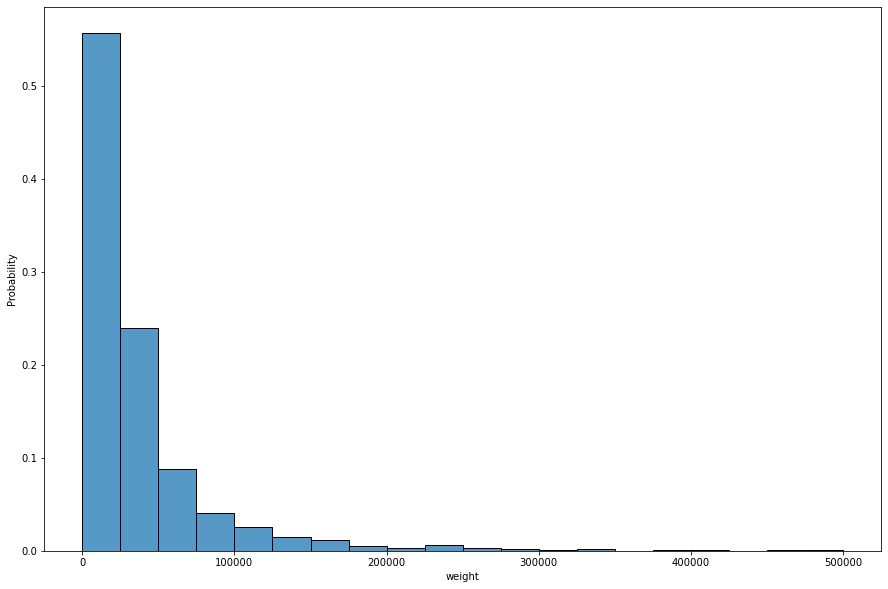

In [15]:
# Vemos la cantidad de reproducciones por usuario
user_rep=user_artist_plays.groupby(['userID'])['weight'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.histplot(user_rep, x='weight',  binwidth=25000, stat='probability')

In [16]:
# Cuantos amigos tiene cada usuario?
friend_q=friend_data.groupby('userID').count()
friend_q.describe()

,friendID
count,1892.000000
mean,13.442918
std,17.312489
min,1.000000
25%,3.000000
50%,6.000000
75%,17.000000
max,119.000000


<AxesSubplot:xlabel='friendID', ylabel='Probability'>

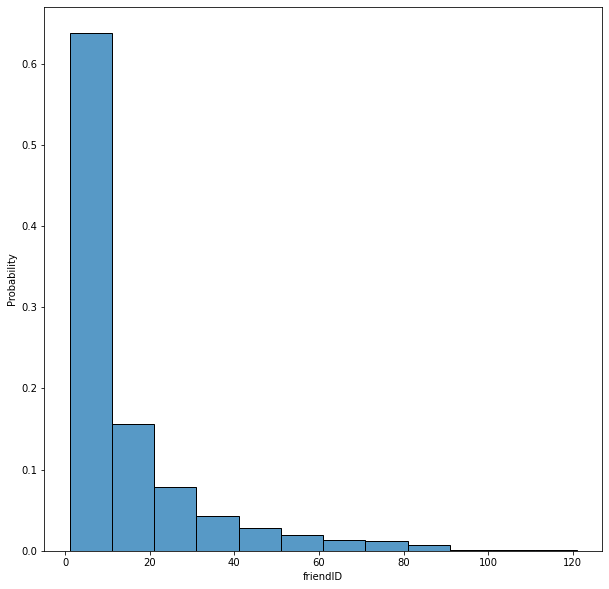

In [17]:
# Graficamos un histograma para ver distribución de cantidad de amigos.
plt.figure(figsize=(10,10))
sns.histplot(friend_q, x='friendID',  binwidth=10, stat='probability')

In [62]:
# Cuales son los generos mas escuchados?
pop_genres=tag_artist_data.groupby('tagID')['userID'].count().sort_values(ascending=False).reset_index().iloc[0:100,]
pop_genres.columns=['tagID','count']
pop_genres['genres_name']=pop_genres['tagID'].map(genres_dict)
pop_genres

TypeError: 'list' object is not callable

In [19]:
# Los amigos y los generos están vinculados?

In [20]:
# Completar

In [21]:
# Como se vinculan los diferentes generos? Son entes aislados o los usuarios los mezclan?

In [22]:
# Completar

## Ejercicio 2 - Sistema de Recomendación

### Ejercicio 2a - Filtrados Colaborativos

Esta parte del ejercicio es obligatoria para quienes quieran aprobar la parte introductoria de la materia (i.e. los contenidos que se ven en las dos primeras clases), quienes estén realizando la materia completa pueden optar por saltearse este ejercicio (aunque es recomendable pensarlo) y pasar directamente al [Ejercicio 2b](#Ejercicio-2b---Sistemas-de-Recomendación-Avanzados). Deberán realizar un sistema de filtrados colaborativos basado en [Surpr!se](http://surpriselib.com/), a partir de los datos que proporciona `LastFM`, en especial el archivo `user_artists.dat`. Tener en cuenta los siguientes pasos:

1. **Desarrollo de la matriz de Usuario-Contenido:** A partir del conjunto de datos deberán generar una matriz de usuario-contenido. Tener en cuenta que los ratings son implícitos, puesto que se dan a partir de la cantidad de veces que un usuario escuchó a determinado artista.
2. **Entrenamiento del algoritmo de recomendación**: Utilizando las herramientas brindadas por [Surpr!se](http://surpriselib.com/), entrenen varios modelos (al menos 3) de sistemas de recomendación basados en filtrado colaborativo a partir de su matriz de usuario-contenido. Recuerden tener en cuenta lo aprendido en la diplomatura a la hora de evaluar y validar el modelo. Si necesitan inspiración, les recomendamos revisar [este notebook con información de como entrenar un sistema de recomendación con Surpr!se](https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Building%20Recommender%20System%20with%20Surprise.ipynb).
3. **Sistema de recomendación**: A partir del mejor modelo de recomendación que haya surgido del caso anterior, y utilizando los datos del archivo `artist.dat`, armar un sistema de recomendación sencillo que, dado un nombre de un artista, devuelva el top 10 de artistas más similares. La idea es que el sistema tome el nombre de un artista y devuelva el nombre de otros artistas (no simplemente tomar y devolver IDs). Se recomienda [revisar este notebook para inspiración (ver el paso número 5)](https://github.com/topspinj/pydata-workshop/blob/master/tutorial.ipynb).

In [23]:
# Importamos las librerías para leer los datos como los necesita suprise
from surprise import Dataset, Reader

In [24]:
# Podemos convertir los ratings implicitos en explicitos de la siguiente manera:
# Cada artistID tiene puntaje igual a weight.userID.artistID/weight.userID. Esto nos captura el caso de que
#user_artist_plays

user_rating=user_artist_plays.groupby(['userID','artistID']).agg({'weight': 'sum'})
# creo la tabla bien agrupada por userID y luego por artistID de forma tal de poder trabajarla luego.
user_rating=user_rating.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).round()
#calculo los % por artist para cada usuario

In [25]:
# Asi podemos volver atrás el groupby
user_rating=user_rating.reset_index()
user_rating

,userID,artistID,weight
0,2,51,8.0
1,2,52,7.0
2,2,53,7.0
3,2,54,6.0
4,2,55,5.0
...,...,...,...
92829,2100,18726,1.0
92830,2100,18727,1.0
92831,2100,18728,1.0
92832,2100,18729,1.0


In [26]:
# https://stackoverflow.com/questions/29247718/map-an-if-statement-in-python
user_rating['rating']=user_rating.weight.map(lambda x: 10 if x > 10 else x)
user_rating=user_rating.drop(['weight'], axis=1)
user_rating

,userID,artistID,rating
0,2,51,8.0
1,2,52,7.0
2,2,53,7.0
3,2,54,6.0
4,2,55,5.0
...,...,...,...
92829,2100,18726,1.0
92830,2100,18727,1.0
92831,2100,18728,1.0
92832,2100,18729,1.0


In [27]:
# Desarrollo de la matriz de Usuario-Contenido
reader=Reader(rating_scale=(1, 10))
data=Dataset.load_from_df(user_rating,reader)

In [28]:
# Hacemos la divisón entre train y test
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate, train_test_split
ratings_train, ratings_test = train_test_split(data, test_size=0.2)

In [29]:
# Estimamos usando KNN With Means
from surprise import KNNWithMeans
model_km = KNNWithMeans(k=10).fit(ratings_train)
predictions_km = model_km.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions_km, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 1.9528


In [30]:
# Estimamos usando KNN with Z-Score
from surprise import KNNWithZScore
model_kz=KNNWithZScore().fit(ratings_train)
predictions_kz = model_kz.test(ratings_test)
print("RMSE on test: {:.4f}".format(rmse(predictions_kz, verbose=False)))

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE on test: 1.9150


In [31]:
# Podemos convertir los ratings implicitos en explicitos de la siguiente manera:
# Cada artistID tiene puntaje igual a weight.userID.artistID/weight.userID. Esto nos captura el caso de que
# tenes un artista favorito que unicamente escuchas (puntuarías como 10)

### Ejercicio 2b - Sistemas de Recomendación Avanzados

Este ejercicio lo deberán completar quienes hayan realizado ambas partes de la materia pues requiere de los conocimientos adquiridos en las segundas dos clases. En este caso, utilizarán no sólo la información de la matriz de usuario-contenido, sino que deberán hacer uso de otra información para poder lidiar con el problema del "Cold Start", i.e. que es lo que ocurre cuando tengo nuevos usuarios o artistas. Tener en cuenta los siguientes pasos:
1. **Evaluación sobre cold start**: Para evaluar como funciona el sistema con el problema del "cold start", deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema. Esos serán los artistas que se evaluarán como "cold start".
2. **Vectores de contenido**: Deberán generar vectores de contenido para los artistas, basados en los tags que los usuarios les dan (ver los archivos `user_taggedartists.dat` y `tags.dat`).
3. **Sistema de recomendación**: Deberán crear un sistema de recomendación que tomará como parámetros la información del artista (i.e. nombre y tags). Con dicha información, deberán disponer de un sistema de recomendación híbrido (utilizando cualquiera de las técnicas vistas en clase) que devuelva artistas similares. El sistema de recomendación deberá utilizar toda la información proporcionada para dar una mejor respuesta.
4. **Evaluación del sistema**: Deberán evaluar "a mano" el sistema sobre artistas que conozca y artistas que no conozca (i.e. que fueron dejados afuera), y hacer un análisis de lo que el sistema está devolviendo.

In [32]:
# 1. Evaluación sobre cold start: Para evaluar como funciona el sistema con el problema del "cold start",
# deberán tomar ciertos artistas y "dejarlos fuera", i.e. remover cualquier participación del artista en el sistema.
# Esos serán los artistas que se evaluarán como "cold start".

In [34]:
# Artistas a eliminar de la base.
# "Katy Perry"

In [35]:
# Como se puede taggear a los artistas?
tag_data.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [45]:
# Como fueron taggeados los artistas?
tag_artist_data.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [87]:
cat_artista=tag_artist_data.drop(['userID','day', 'month', 'year'], axis=1)
cat_artista['artista']=cat_artista['artistID'].map(artist_dict)
cat_artista['genero']=cat_artista['tagID'].map(genres_dict)
cat_artista=cat_artista.drop(['artistID','tagID'], axis=1)

In [89]:
cat_artista['genero']=cat_artista['genero'].apply(pd.Series).stack().sum(level=0)
cat_artista['artista']=cat_artista['artista'].apply(pd.Series).stack().sum(level=0)
cat_artista

,artista,genero
0,Morcheeba,chillout
1,Morcheeba,downtempo
2,Morcheeba,electronic
3,Morcheeba,trip-hop
4,Morcheeba,female vovalists
...,...,...
186474,Les Discrets,black metal
186475,Les Discrets,folk
186476,Les Discrets,depressive black metal
186477,Les Discrets,dark folk


In [ ]:
# Tenemos que tokenizar los generos y despues hacer un groupby y borrar los generos.